**A1.4C.3** - Does the system support visual analytics capabilities, including but not limited to image, video, segmentation, object detection, motion detection. If yes, please elaborate.


# Image Classification

In [58]:
from torchvision.io import read_image
from torchvision.models import resnet50, ResNet50_Weights
import requests
from PIL import Image
from io import BytesIO
import torch

# Download an example image
response = requests.get('https://raw.githubusercontent.com/Cadene/pretrained-models.pytorch/master/data/cat.jpg')

img = Image.open(BytesIO(response.content))

# Step 1: Initialize model with the best available weights
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"{category_name}: {100 * score:.1f}%")

tabby: 17.2%


In [59]:
preprocess

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

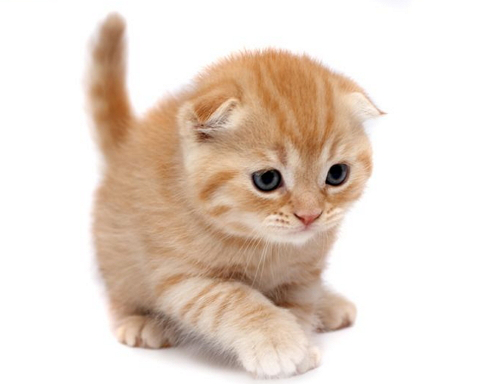

In [2]:
img

# Video + Object Detection

In [31]:
import requests

url = 'https://samplelib.com/lib/preview/mp4/sample-5s.mp4'
r = requests.get(url, allow_redirects=True)

with open('sample-5s.mp4', 'wb') as file:
    file.write(r.content)


In [30]:
import requests

url = 'https://github.com/OlafenwaMoses/ImageAI/releases/download/3.0.0-pretrained/yolov3.pt'
r = requests.get(url, allow_redirects=True)

with open('yolov3.pt', 'wb') as file:
    file.write(r.content)

In [ ]:
https://github.com/OlafenwaMoses/ImageAI/releases/download/3.0.0-pretrained/yolov3.pt/

In [18]:
!pip install opencv-python-headless
!pip install tensorflow
!pip install keras
!pip install ImageAI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 43.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 9.2 MB/s eta 0:00:00


In [22]:
!pip install --upgrade imageai

In [32]:
from imageai.Detection import VideoObjectDetection
import os

execution_path = os.getcwd()

detector = VideoObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath("yolov3.pt")  # Change this path to where you've placed the model
detector.loadModel()

video_path = detector.detectObjectsFromVideo(
    input_file_path=os.path.join(execution_path, "sample-5s.mp4"),  # Change this path to your input video
    output_file_path="/project_data/data_asset/detected_video.mp4",
    frames_per_second=20,
    log_progress=True
)

print(video_path)

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Processing Frame :  1
Processing Frame :  2
Processing Frame :  3
Processing Frame :  4
Processing Frame :  5
Processing Frame :  6
Processing Frame :  7
Processing Frame :  8
Processing Frame :  9
Processing Frame :  10
Processing Frame :  11
Processing Frame :  12
Processing Frame :  13
Processing Frame :  14
Processing Frame :  15
Processing Frame :  16
Processing Frame :  17
Processing Frame :  18
Processing Frame :  19
Processing Frame :  20
Processing Frame :  21
Processing Frame :  22
Processing Frame :  23
Processing Frame :  24
Processing Frame :  25
Processing Frame :  26
Processing Frame :  27
Processing Frame :  28
Processing Frame :  29
Processing Frame :  30
Processing Frame :  31
Processing Frame :  32
Processing Frame :  33
Processing Frame :  34
Processing Frame :  35
Processing Frame :  36
Processing Frame :  37
Processing Frame :  38
Processing Frame :  39
Processing Frame :  40
Processing Frame :  41
Processing Frame :  42
Processing Frame :  43
Processing Frame :  

# Image Segmentation

/opt/conda/envs/Python-3.10-Premium/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/opt/conda/envs/Python-3.10-Premium/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


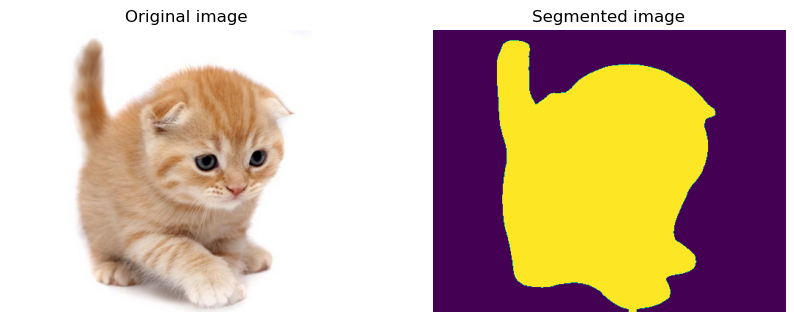

In [52]:
# Import necessary libraries
import torch
from torchvision import models, transforms
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

# Specify the URL of the image
url = 'https://raw.githubusercontent.com/Cadene/pretrained-models.pytorch/master/data/cat.jpg' 

# Download the image
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Load the pre-trained model
model = models.segmentation.deeplabv3_resnet101(pretrained=True)
model.eval()

# Preprocess the image
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(img)
input_batch = input_tensor.unsqueeze(0)

# Don't compute gradients
with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

# Visualize the original image
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title('Original image')

# Visualize the segmented image
plt.subplot(1,2,2)
plt.imshow(output_predictions)
plt.axis('off')
plt.title('Segmented image')
plt.show()

# Motion Detection

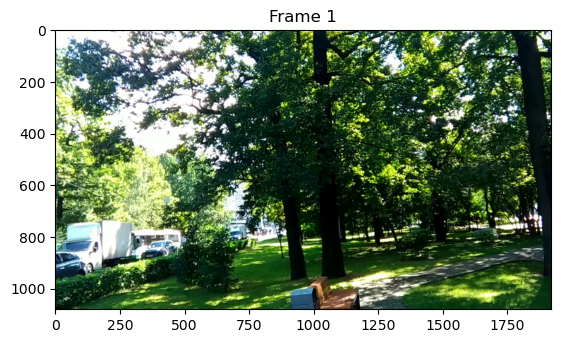

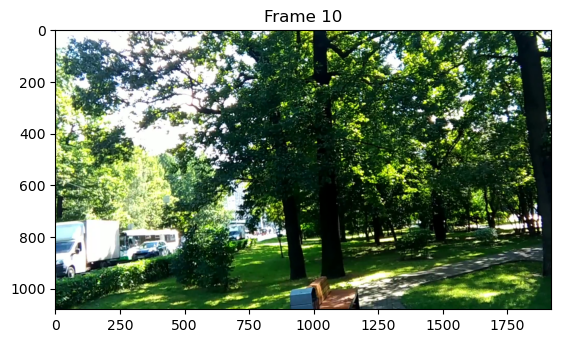

True

In [37]:
import cv2
import matplotlib.pyplot as plt

video_source = 'sample-5s.mp4'

# Open the video file
cap = cv2.VideoCapture(video_source)

if not cap.isOpened():
    print('Error: Cannot open video file')

frames_to_save = [1, 10]  # frames we want to save
counter = 0
frames = []

while True:
    ret, frame = cap.read()

    # Break the loop if frame is not returned (i.e., end of video)
    if not ret:
        break

    counter += 1

    # If the current frame number is in our list, save it
    if counter in frames_to_save:
        # Convert the image from BGR color (which OpenCV uses) to RGB for plotting
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)

        # If we have collected all desired frames, no need to read further frames
        if len(frames) == len(frames_to_save):
            break

cap.release()  # Close the video file

# Now, let's display the saved frames
for i, frame in enumerate(frames):
    plt.figure(i)
    plt.imshow(frame)
    plt.title(f'Frame {frames_to_save[i]}')

plt.show()

cv2.imwrite('frame1.jpg', cv2.cvtColor(frames[0], cv2.COLOR_RGB2BGR))
cv2.imwrite('frame2.jpg', cv2.cvtColor(frames[1], cv2.COLOR_RGB2BGR))

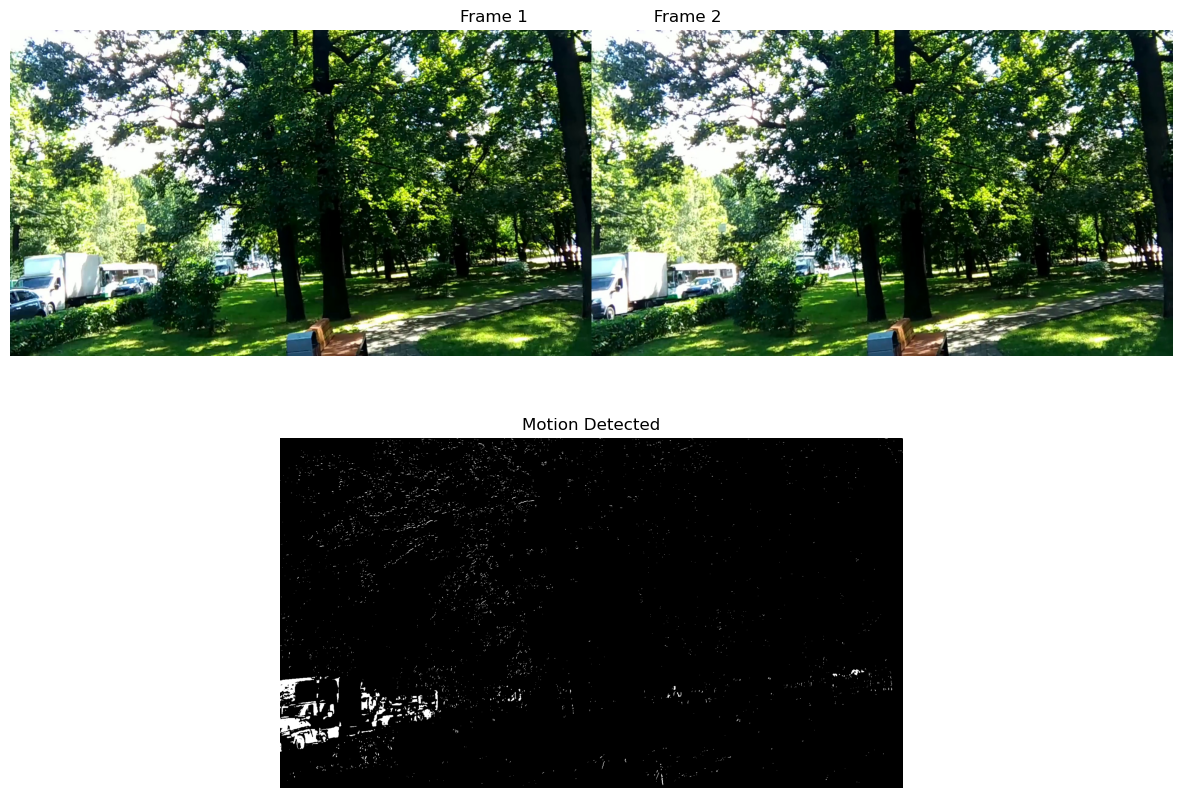

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load the two frames as color images
frame1 = cv2.imread('frame1.jpg')
frame2 = cv2.imread('frame2.jpg')

# convert the frames to RGB color space (OpenCV uses BGR by default)
frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
frame2_rgb = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)

# calculate absolute difference
difference = cv2.absdiff(frame1, frame2)

# convert difference to grayscale
difference_gray = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)

# apply threshold to highlight areas with significant difference
_, thresholded_difference = cv2.threshold(difference_gray, 100, 255, cv2.THRESH_BINARY)

# plot the images
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Plot frame 1 and frame 2 side by side
axs[0].imshow(np.concatenate((frame1_rgb, frame2_rgb), axis=1))
axs[0].set_title('Frame 1                        Frame 2')
axs[0].axis('off')

# Plot the motion detected below frame 1 and frame 2
axs[1].imshow(thresholded_difference, cmap='gray')
axs[1].set_title('Motion Detected')
axs[1].axis('off')


plt.show()
